# Relationship between sensitivity and underlying perceptual scale

Author: Guillermo Aguilar - March, May, Sep 2022


In [76]:
from cProfile import label
from math import log
from scipy.stats import linregress
import pandas as pd
import numpy as np
from scipy import interpolate
from scipy.optimize import curve_fit

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('talk')


def powerfunc(x, c, a, b, e, d):
    """ A generic power function"""
    return c*(a*x+b)**e+d


def powerfunc_const(x, a, e, b):
    """ A more constrained  power function"""
    return a*(x)**e+b


def lnfunc(x, c, a, b):
    """ Natural logarithm function"""
    return c*np.log(a*x+b)


def turn_after_dip_to_df(cpd):
    """
    takes a df and a number takes a dataframe and turns it to loglog and takes the sub df after the minimum y value(by calling the function: after_the_dip)
    """
    cpd = log_maker(cpd)
    x, y = after_the_dip(cpd)
    df = pd.DataFrame({"x": x, "Curve1": y}, columns=['x', 'Curve1'])
    return df


def after_the_dip(cpd, number=1):
    """
    takes a df and gives 2 arrays which are created from the sub df(after y minimum)
    """
    curve_y = list(cpd["Curve1"]*number)
    curve_x = list(cpd["x"]*number)
    min_arr = int(curve_y.index(min(curve_y)))
    curve_y = curve_y[min_arr:]
    curve_x = curve_x[min_arr:]
    return curve_x, curve_y


def after_the_dip_df(cpd, number=1):
    """
    takes a df and gives 2 arrays which are creeated from the sub df(after y minimum)
    """
    curve_y = list(cpd["Curve1"]*number)
    curve_x = list(cpd["x"])
    min_arr = int(curve_y.index(min(curve_y)))
    curve_y = curve_y[min_arr:]
    curve_x = curve_x[min_arr:]
    df = pd.DataFrame({"x": curve_x, "Curve1": curve_y},
                      columns=['x', 'Curve1'])
    return df


def slope_intercept(cpd, number=1):
    """
    calculates the slope of the graph of df and returns it by rounding to 6 digits
    """
    curve_x, curve_y = after_the_dip(cpd)
    curve_y = list(np.log(curve_y))
    curve_x = list(np.log(curve_x))
    return linregress(curve_x, curve_y).slope, linregress(curve_x, curve_y).intercept


def log_maker(cpd):
    """
        returns the loglog version of the df
    """
    cpd["x"] = [log(x) for x in cpd["x"]]
    cpd["Curve1"] = [log(x) for x in cpd["Curve1"]]
    return cpd


In [77]:
# reading the csv files

cpd_0 = after_the_dip_df(pd.read_csv("Bird_csv/0cpd_cmb.csv"))
cpd_2 = after_the_dip_df( pd.read_csv("Bird_csv/2cpd_cmb.csv"))
cpd_4 = after_the_dip_df(pd.read_csv("Bird_csv/4cpd_cmb.csv"))
cpd_8 = after_the_dip_df (pd.read_csv("Bird_csv/8cpd_cmb.csv"))
cpd_16 = after_the_dip_df(pd.read_csv("Bird_csv/16cpd_cmb.csv"))
cpd_0_gbh =after_the_dip_df(pd.read_csv("Bird_csv/0cpd_gbh.csv"))
cpd_2_gbh =after_the_dip_df (pd.read_csv("Bird_csv/2cpd_gbh.csv"))
cpd_4_gbh =after_the_dip_df(pd.read_csv("Bird_csv/4cpd_gbh.csv"))
cpd_8_gbh =after_the_dip_df (pd.read_csv("Bird_csv/8cpd_gbh.csv"))
cpd_16_gbh =after_the_dip_df (pd.read_csv("Bird_csv/16cpd_gbh.csv"))

## 1. Setting up the relationship betwen thresholds and stimulus value

### the threshold vs. intensity (TvI) function


In [78]:
# choice of spacing
# linear spacing
#x = np.linspace(0.02, 1.1, 25)

# logarithmic spacing
x = np.geomspace(0.01, 1.0, 25)
log_x = np.log10(x)
print(x)


[0.01       0.01211528 0.01467799 0.01778279 0.02154435 0.02610157
 0.03162278 0.03831187 0.04641589 0.05623413 0.06812921 0.08254042
 0.1        0.12115277 0.14677993 0.17782794 0.21544347 0.26101572
 0.31622777 0.38311868 0.46415888 0.56234133 0.68129207 0.82540419
 1.        ]


Text(0.5, 1.0, 'Contrast Discrimination for GBH (simulated)')

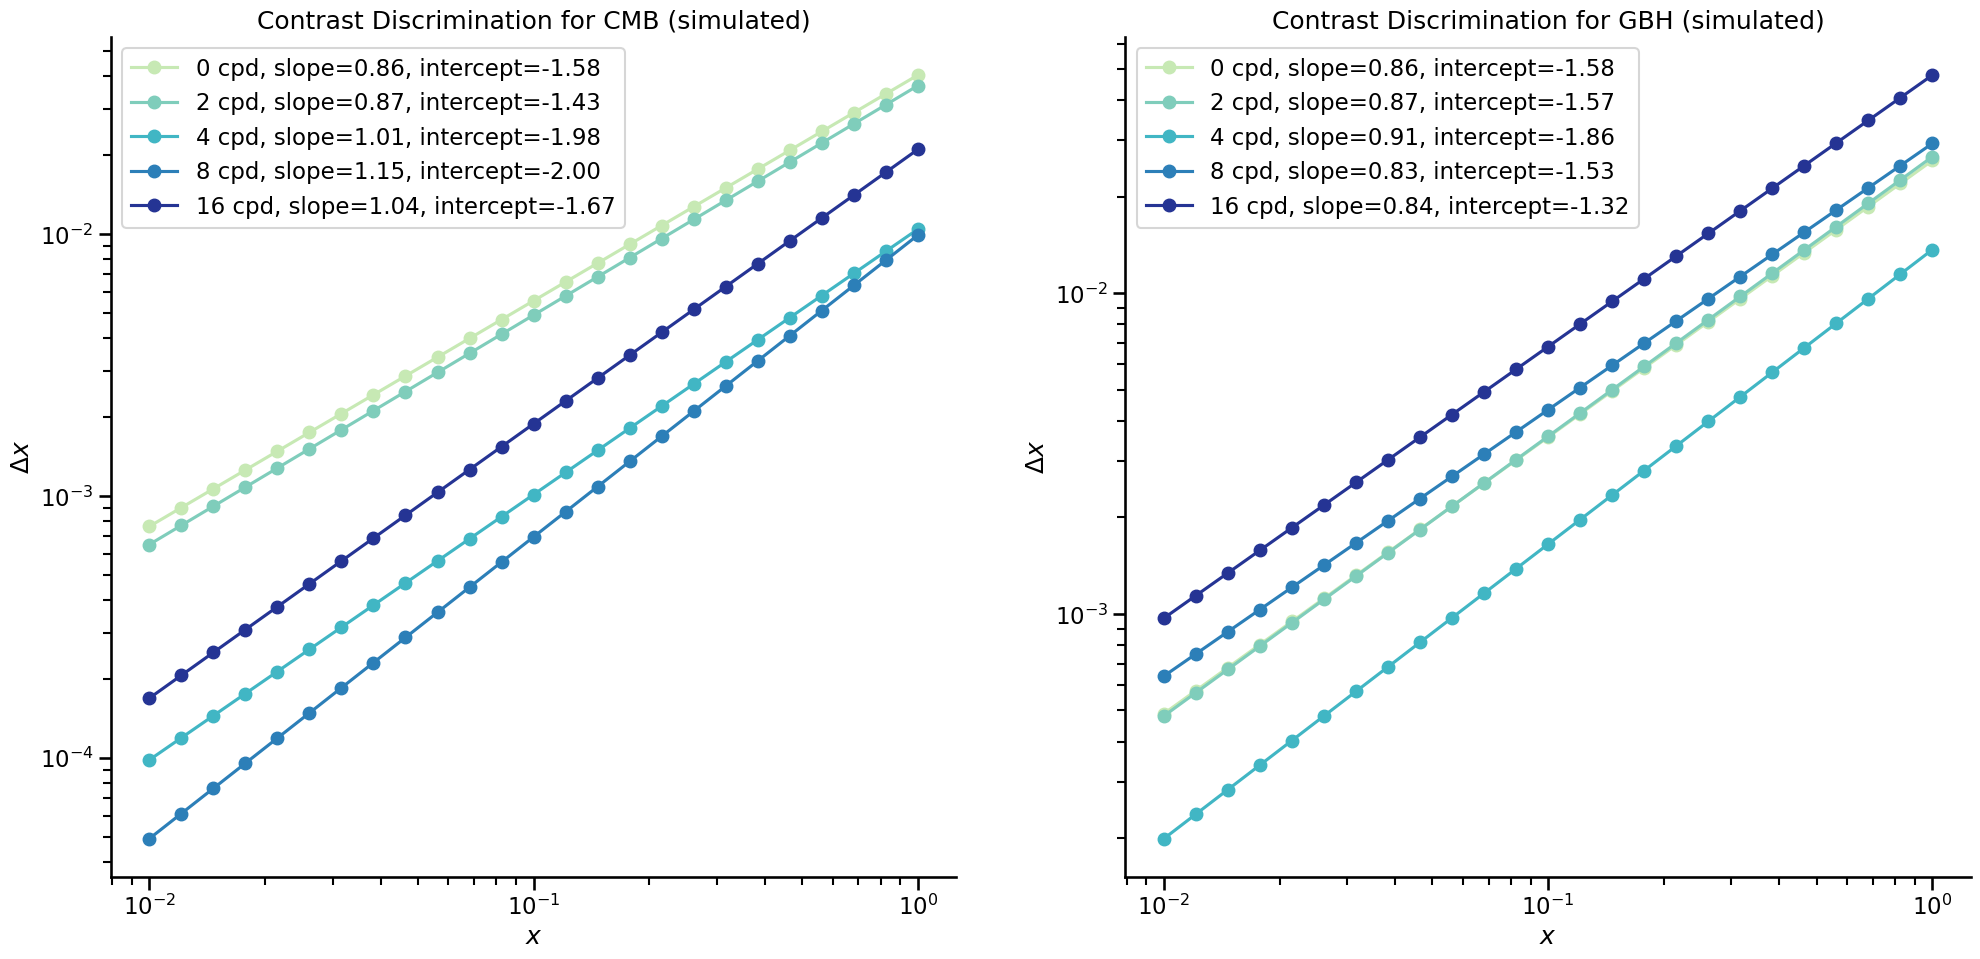

In [79]:
# choice of TvI: Weber's law

# we can define Weber's law in log log coordinates
# (as in Shooner and Mullen or in any other work have measured the dipper function)

# setting up relationship between delta C and C
slope_0, intercept_0 = slope_intercept(cpd_0)
slope_2, intercept_2 = slope_intercept(cpd_2)
slope_4, intercept_4 = slope_intercept(cpd_4)
slope_8, intercept_8 = slope_intercept(cpd_8)
slope_16, intercept_16 = slope_intercept(cpd_16)
slope_0_gbh, intercept_0_gbh = slope_intercept(cpd_0_gbh)
slope_2_gbh, intercept_2_gbh = slope_intercept(cpd_2_gbh)
slope_4_gbh, intercept_4_gbh= slope_intercept(cpd_4_gbh)
slope_8_gbh, intercept_8_gbh = slope_intercept(cpd_8_gbh)
slope_16_gbh, intercept_16_gbh = slope_intercept(cpd_16_gbh)
log_x = np.log10(x)

intercept = 0.0
log_dx = slope_0 * log_x + intercept  # defines linear relatioship
# transforms back to linear values for visualization
# CMB
dx0 = 10**(slope_0*log_x+intercept_0)
dx2 = 10**(slope_2*log_x+intercept_2)
dx4 = 10**(slope_4*log_x+intercept_4)
dx8 = 10**(slope_8*log_x+intercept_8)
dx16 = 10**(slope_16*log_x+intercept_16)
dx0_gbh = 10**(slope_0_gbh*log_x+intercept_0_gbh)
dx2_gbh = 10**(slope_2_gbh*log_x+intercept_2_gbh)
dx4_gbh = 10**(slope_4_gbh*log_x+intercept_4_gbh)
dx8_gbh = 10**(slope_8_gbh*log_x+intercept_8_gbh)
dx16_gbh = 10**(slope_16_gbh*log_x+intercept_16_gbh)
logdefined = True

# or we define Weber's law in 'normal' units
# slope = 1.0   # the slope is the Weber's fraction
# dx = slope * x # defines linear relatioship
# log_dx = np.log(dx) # for visualiation
# logdefined=False


# visualizing... 
# CMB contrast disc
fig = plt.figure(figsize=(24, 24))
ax = fig.add_subplot(2, 2, 1)
line_0, = ax.plot(x, dx0, '-o', color="#c7e9b4",label=f"0 cpd, slope={str(slope_0)[:4]}, intercept={str(intercept_0_gbh)[:5]}")
line_2, = ax.plot(x, dx2, '-o', color="#7fcdbb",label=f"2 cpd, slope={str(slope_2)[:4]}, intercept={str(intercept_2)[:5]}")
line_4, = ax.plot(x, dx4, '-o', color="#41b6c4",label=f"4 cpd, slope={str(slope_4)[:4]}, intercept={str(intercept_4)[:5]}")
line_8, = ax.plot(x, dx8, '-o', color="#2c7fb8",label=f"8 cpd, slope={str(slope_8)[:4]}, intercept={str(intercept_8)[:5]}")
line_16, = ax.plot(x, dx16, '-o',color="#253494", label=f"16 cpd, slope={str(slope_16)[:4]}, intercept={str(intercept_16)[:5]}")
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend()
plt.ylabel('$\Delta x$')
plt.xlabel('$x$')
plt.title('Contrast Discrimination for CMB (simulated)')


# GBH Contrast disc
ax = fig.add_subplot(2, 2, 2)
line_0_gbh , = ax.plot(x, dx0_gbh ,'-o' ,color="#c7e9b4",label=f"0 cpd, slope={str(slope_0_gbh)[:4]}, intercept={str(intercept_0_gbh)[:5]}")
line_2_gbh , = ax.plot(x, dx2_gbh , '-o',color="#7fcdbb", label=f"2 cpd, slope={str(slope_2_gbh)[:4]}, intercept={str(intercept_2_gbh)[:5]}")
line_4_gbh , = ax.plot(x, dx4_gbh , '-o',color="#41b6c4", label=f"4 cpd, slope={str(slope_4_gbh)[:4]}, intercept={str(intercept_4_gbh)[:5]}")
line_8_gbh , = ax.plot(x, dx8_gbh , '-o', color="#2c7fb8",label=f"8 cpd, slope={str(slope_8_gbh)[:4]}, intercept={str(intercept_8_gbh)[:5]}")
line_16_gbh , = ax.plot(x, dx16_gbh , '-o',color="#253494", label=f"16 cpd, slope={str(slope_16_gbh)[:4]}, intercept={str(intercept_16_gbh)[:5]}")
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend()
sns.despine()
plt.ylabel('$\Delta x$')
plt.xlabel('$x$')
plt.title('Contrast Discrimination for GBH (simulated)')






When we (experimentally) find or (in simulations) define a linear relationship between $\Delta x$ and $x$ in log-log coordinates, which is charactheristic of the right side of a dipper function (Baird, Henning, Wichmann 2002, Shonner & Mullen 2022, among others), we are actually defining a TvI that is a power function in linear coordinates.

The math is the following. Define a linear relationship

$$ log(\Delta x) = s \cdot log(x) + i $$

where s is the slop and i is the intercept of the linear relationship. We then do some algebraic manipulation and arrive to

$$ log(\Delta x) = s \cdot log(x) + i \cdot log(10)$$
$$ log(\Delta x) = log(x^s) + log(10^i)$$
$$ log(\Delta x) = log(x^s \cdot 10^i)$$
$$ \Delta x = 10^i \cdot x^s $$

The resulting relationship between $\Delta x$ and $x$ in _linear_ coordinates is a power function with exponent equal to the defined slope multiplied by a gain factor of 10 to the intercept.


gain= 0.04


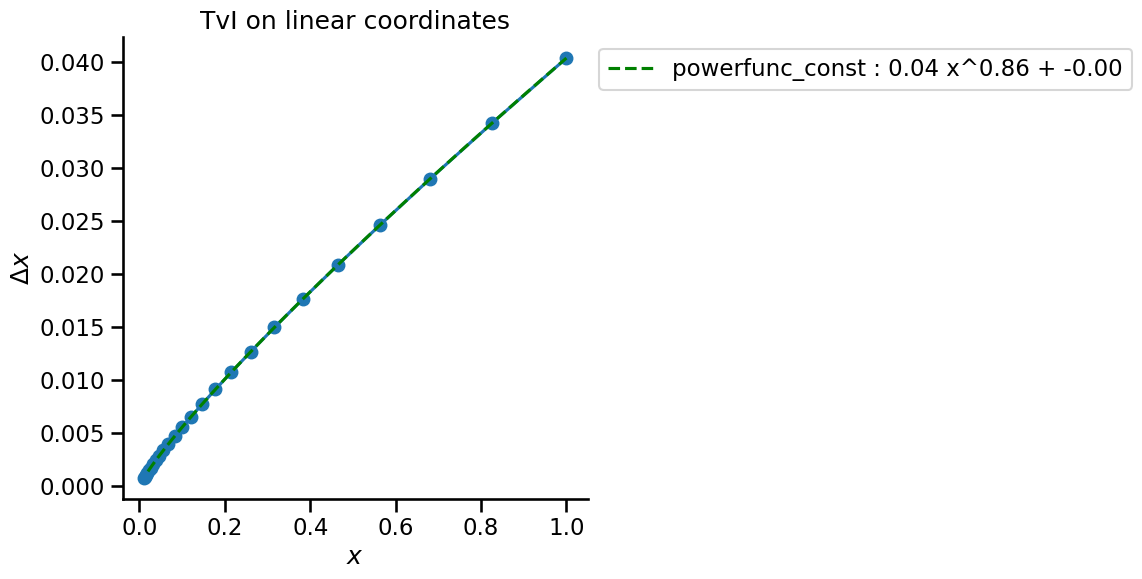

In [80]:
fig, ax = plt.subplots(figsize=(6, 6))
line, = ax.plot(x, dx0, '-o')

try:
    param_power, _ = curve_fit(powerfunc_const, x, dx0)
    xs = np.geomspace(0.02, 1.0, 100)
    plt.plot(xs, powerfunc_const(xs, *param_power), 'g--',
             label='powerfunc_const : %.2f x^%.2f + %.2f' % tuple(param_power))
except:
    pass

plt.ylabel('$\Delta x$')
plt.xlabel('$x$')
plt.title('TvI on linear coordinates')
sns.despine()
plt.legend()
plt.legend(bbox_to_anchor=(1.0, 1.0))

print('gain= %.2f' % 10**intercept_0)


Another common visualization of the TvI is done as sensitivity, calculated as $\frac{1}{\Delta x}$. Here is the same data as above but only the y-axis has been transformed to sensitivity.


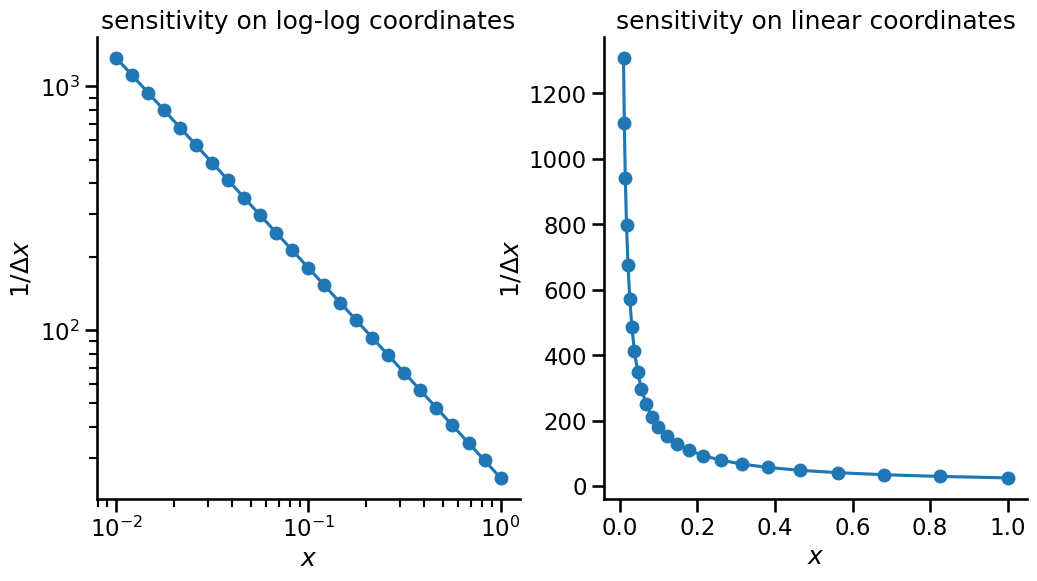

In [81]:
# visualizing sensitivity
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
line, = ax.plot(x, 1.0/dx0, '-o')
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('1/$\Delta x$')
plt.xlabel('$x$')
plt.title('sensitivity on log-log coordinates')

ax = fig.add_subplot(1, 2, 2)
line, = ax.plot(x, 1.0/dx0, '-o')
plt.ylabel('$1/\Delta x$')
plt.xlabel('$x$')
plt.title('sensitivity on linear coordinates')
sns.despine()


## 2. From sensitivity to a scale: Fechnerian integration

To obtain a scale $\Psi(x)$ we cummulatively sum the inverse thresholds (i.e. sensitivity),

$$
\Psi(x) = \sum^x_{i=0} \frac{1}{\Delta x (i)} dx
$$

where $dx$ is the sample steps along the x-axis on the sensivity function (this might or might not be constant, depending on the stimulus sampling).

In other words, we sum the discrete rectangles below the sensitivity cuve, that is the same to say that we integrate along the curve. The reasoning is the following.

We first assume that every JND ($\Delta x$) evokes a unit of difference in sensation. Then we have that at a given point on the scale, the slope of the scale (its derivative) is the difference in sensation divided by the difference in stimulus (JND),

$$\frac{d \Psi (x)}{d x} = \frac{1}{\Delta x}$$

We move $dx$ to the right and integrate both sides

$$\int d \Psi(x) = \int \frac{1}{\Delta x} dx$$

$$\Psi(x) = \int \frac{1}{\Delta x} dx$$

This last equation is the continuous version of the first one.


0    0.39179
1    0.72021
2    1.21520
3    2.40940
4    4.14220
Name: Curve1, dtype: float64


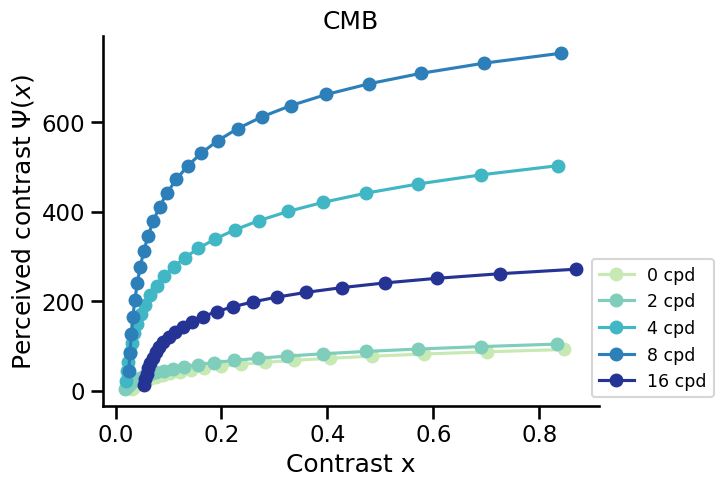

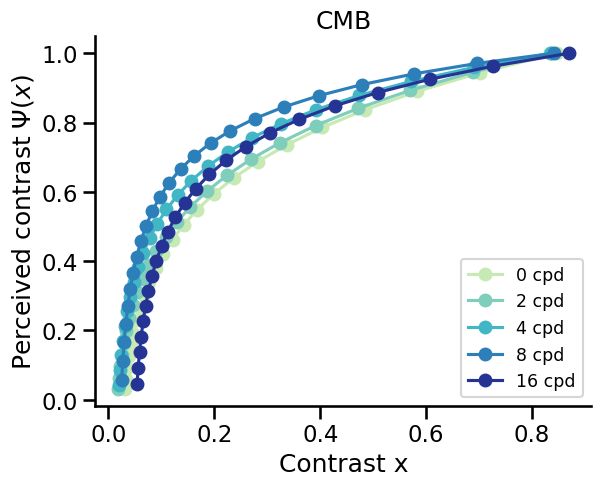

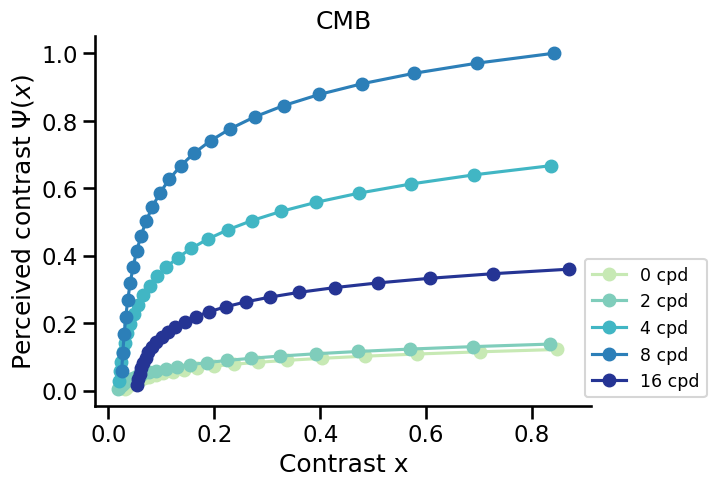

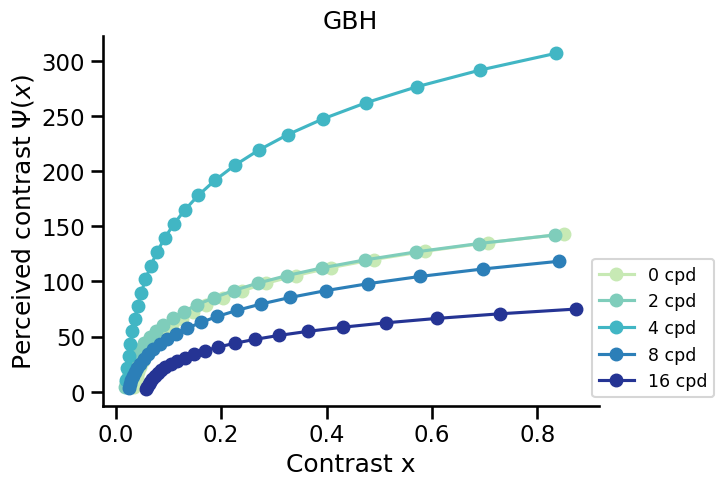

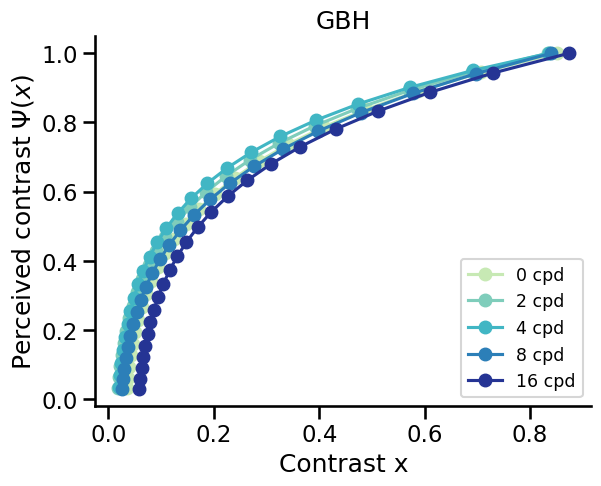

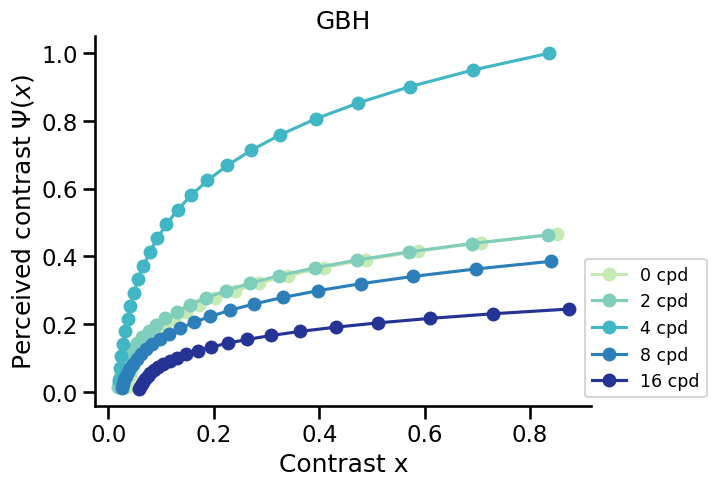

In [82]:
# we first calculate the vector of differences dx
stepx = np.diff(x)

# here we multiply point-wise each dx times the inverse of the threshold
yy0 = (1/dx0[:-1]) * stepx
yy2 = (1/dx2[:-1]) * stepx
yy4 = (1/dx4[:-1]) * stepx
yy8 = (1/dx8[:-1]) * stepx
yy16 = (1/dx16[:-1]) * stepx
yy0_gbh = (1/dx0_gbh[:-1]) * stepx
yy2_gbh = (1/dx2_gbh[:-1]) * stepx
yy4_gbh = (1/dx4_gbh[:-1]) * stepx
yy8_gbh = (1/dx8_gbh[:-1]) * stepx
yy16_gbh = (1/dx16_gbh[:-1]) * stepx

# we sum cummulatively
scale_0 = np.cumsum(yy0)
scale_2 = np.cumsum(yy2)
scale_4 = np.cumsum(yy4)
scale_8 = np.cumsum(yy8)
scale_16 = np.cumsum(yy16)
scale_0_gbh = np.cumsum(yy0_gbh)
scale_2_gbh = np.cumsum(yy2_gbh)
scale_4_gbh = np.cumsum(yy4_gbh)
scale_8_gbh = np.cumsum(yy8_gbh)
scale_16_gbh = np.cumsum(yy16_gbh)

nx = x[:-1]
print(cpd_0["Curve1"])
# CMB with first thresholds added
plt.plot(nx+0.021, scale_0, '-o',color="#c7e9b4", label="0 cpd")
plt.plot(nx+0.008, scale_2, '-o',color="#7fcdbb",label="2 cpd")
plt.plot(nx+0.0095, scale_4, '-o',color="#41b6c4",label="4 cpd")
plt.plot(nx+0.015, scale_8, '-o',color="#2c7fb8",label="8 cpd")
plt.plot(nx+0.044, scale_16, '-o',color="#253494",label="16 cpd")
plt.legend(loc='lower right',fontsize="x-small",bbox_to_anchor=(1.25, 0))
sns.despine()
plt.xlabel('Contrast x')
plt.ylabel('Perceived contrast $\Psi(x)$')
plt.title('CMB')
plt.show()

# CMB normalized to max of each SF
plt.plot(nx+ 0.021, scale_0/np.max(scale_0), '-o',color="#c7e9b4", label="0 cpd")
plt.plot(nx+0.008, scale_2/np.max(scale_2), '-o',color="#7fcdbb",label="2 cpd")
plt.plot(nx+0.0095, scale_4/np.max(scale_4), '-o',color="#41b6c4",label="4 cpd")
plt.plot(nx+0.015, scale_8/np.max(scale_8), '-o',color="#2c7fb8",label="8 cpd")
plt.plot(nx+0.044, scale_16/np.max(scale_16), '-o',color="#253494",label="16 cpd")
plt.legend(loc='lower right',fontsize="x-small")
sns.despine()
plt.xlabel('Contrast x')
plt.ylabel('Perceived contrast $\Psi(x)$')
plt.title('CMB')
plt.show()

# CMB normalized to max value
plt.plot(nx+0.021, scale_0/np.max(scale_8), '-o',color="#c7e9b4", label="0 cpd")
plt.plot(nx+0.008, scale_2/np.max(scale_8), '-o',color="#7fcdbb",label="2 cpd")
plt.plot(nx+0.0095, scale_4/np.max(scale_8), '-o',color="#41b6c4",label="4 cpd")
plt.plot(nx+0.015, scale_8/np.max(scale_8), '-o',color="#2c7fb8",label="8 cpd")
plt.plot(nx+0.044, scale_16/np.max(scale_8), '-o',color="#253494",label="16 cpd")
plt.legend(loc='lower right',fontsize="x-small",bbox_to_anchor=(1.25, 0))
sns.despine()
plt.xlabel('Contrast x')
plt.ylabel('Perceived contrast $\Psi(x)$')
plt.title('CMB')
plt.show()

# GBH
plt.plot(nx+0.025, scale_0_gbh, '-o',color="#c7e9b4", label="0 cpd")
plt.plot(nx+0.008, scale_2_gbh, '-o',color="#7fcdbb",label="2 cpd")
plt.plot(nx+0.010, scale_4_gbh, '-o',color="#41b6c4",label="4 cpd")
plt.plot(nx+0.015, scale_8_gbh, '-o',color="#2c7fb8",label="8 cpd")
plt.plot(nx+0.048, scale_16_gbh, '-o',color="#253494",label="16 cpd")
plt.legend(loc='lower right',fontsize="x-small",bbox_to_anchor=(1.25, 0))
sns.despine()
plt.xlabel('Contrast x')
plt.ylabel('Perceived contrast $\Psi(x)$')
plt.title('GBH')
plt.show()

# GBH normalized to max of each SF
plt.plot(nx+0.025, scale_0_gbh/np.max(scale_0_gbh), '-o',color="#c7e9b4", label="0 cpd")
plt.plot(nx+0.008, scale_2_gbh/np.max(scale_2_gbh), '-o',color="#7fcdbb",label="2 cpd")
plt.plot(nx+0.010, scale_4_gbh/np.max(scale_4_gbh), '-o',color="#41b6c4",label="4 cpd")
plt.plot(nx+0.015, scale_8_gbh/np.max(scale_8_gbh), '-o',color="#2c7fb8",label="8 cpd")
plt.plot(nx+0.048, scale_16_gbh/np.max(scale_16_gbh), '-o',color="#253494",label="16 cpd")
plt.legend(loc='lower right',fontsize="x-small")
sns.despine()
plt.xlabel('Contrast x')
plt.ylabel('Perceived contrast $\Psi(x)$')
plt.title('GBH')
plt.show()

# GBH normalized to max value
plt.plot(nx+0.025, scale_0_gbh/np.max(scale_4_gbh), '-o',color="#c7e9b4", label="0 cpd")
plt.plot(nx+0.008, scale_2_gbh/np.max(scale_4_gbh), '-o',color="#7fcdbb",label="2 cpd")
plt.plot(nx+0.010, scale_4_gbh/np.max(scale_4_gbh), '-o',color="#41b6c4",label="4 cpd")
plt.plot(nx+0.015, scale_8_gbh/np.max(scale_4_gbh), '-o',color="#2c7fb8",label="8 cpd")
plt.plot(nx+0.048, scale_16_gbh/np.max(scale_4_gbh), '-o',color="#253494",label="16 cpd")
plt.legend(loc='lower right',fontsize="x-small",bbox_to_anchor=(1.25, 0))
sns.despine()
plt.xlabel('Contrast x')
plt.ylabel('Perceived contrast $\Psi(x)$')
plt.title('GBH')
plt.show()

# fig.savefig('scale.pdf')


When the TvI has a slope = 1.0 in log-log coordinates, the relationship in linear coordiantes is also linear. When that is the case, we have **Weber's law**. And when we integrate Weber's law, we obtain **Fechner's law**, a natural logarithm relationship between stimulus and perceived intensity. Fechner did the mathematical derivation from above, and concluded that when Weber's law holds perfectly in linear coordinates, then the resulting scale follows the natural logarithm.

When we have a linear relationship in the TvI in log-log coordinates, the relationship in linear coordinates is a power function. When we integrate a power function, we obtain another power function (and not a log function).


# 3. Fitting

Here we fit the derived scale with either a power or a logarithmic function.


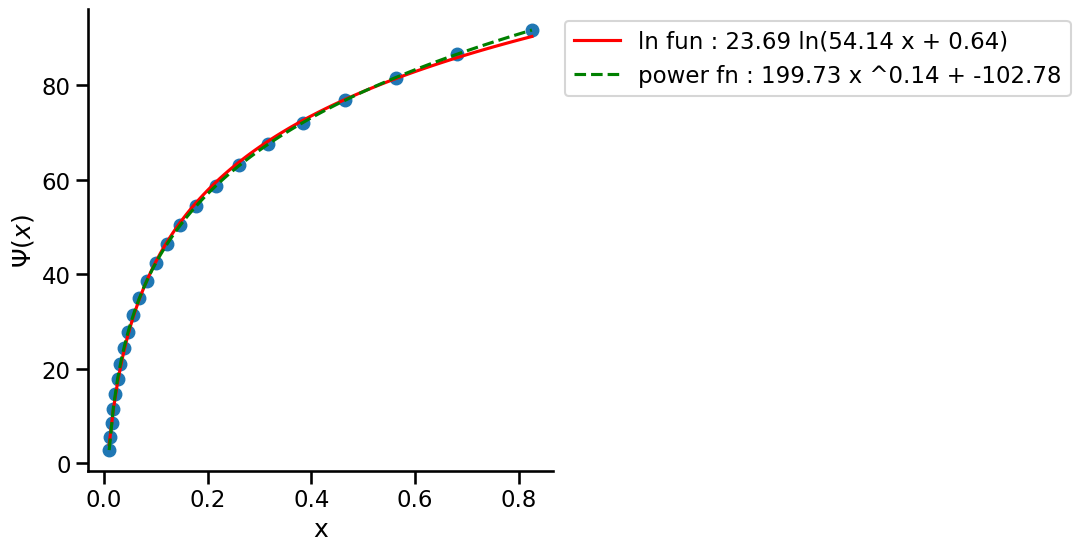

In [83]:
fig = plt.figure(figsize=(6, 6))
plt.plot(nx, scale_0, 'o')
sns.despine()
plt.xlabel('x')
plt.ylabel('$\Psi(x)$')

xs = np.linspace(nx.min(), nx.max(), 100)

fit_ln, fit_power = False, False
# log fit
try:
    param_ln, pcov_ln = curve_fit(lnfunc, nx, scale_0)
    # print(param_ln)
    plt.plot(xs, lnfunc(xs, *param_ln), 'r-',
             label='ln fun : %.2f ln(%.2f x + %.2f)' % tuple(param_ln))

    fit_ln = True
except:
    pass

# power law fit
try:
    param_power, pcov_power = curve_fit(powerfunc_const, nx, scale_0)
    # print(param_power)
    plt.plot(xs, powerfunc_const(xs, *param_power), 'g--',
             label='power fn : %.2f x ^%.2f + %.2f' % tuple(param_power))
    fit_power = True
except:
    pass

plt.legend()
plt.legend(bbox_to_anchor=(1.0, 1.0))

# keeping only the best fit
if fit_power and fit_ln:
    if np.sum(np.diag(pcov_power)) < np.sum(np.diag(pcov_ln)):
        fit_ln = False
    else:
        fit_power = False


## 4. Sanity check: the derivative should correspond to sensitivity, in other words, the inverse of the derivative should be the TvI


NameError: name 'dx' is not defined

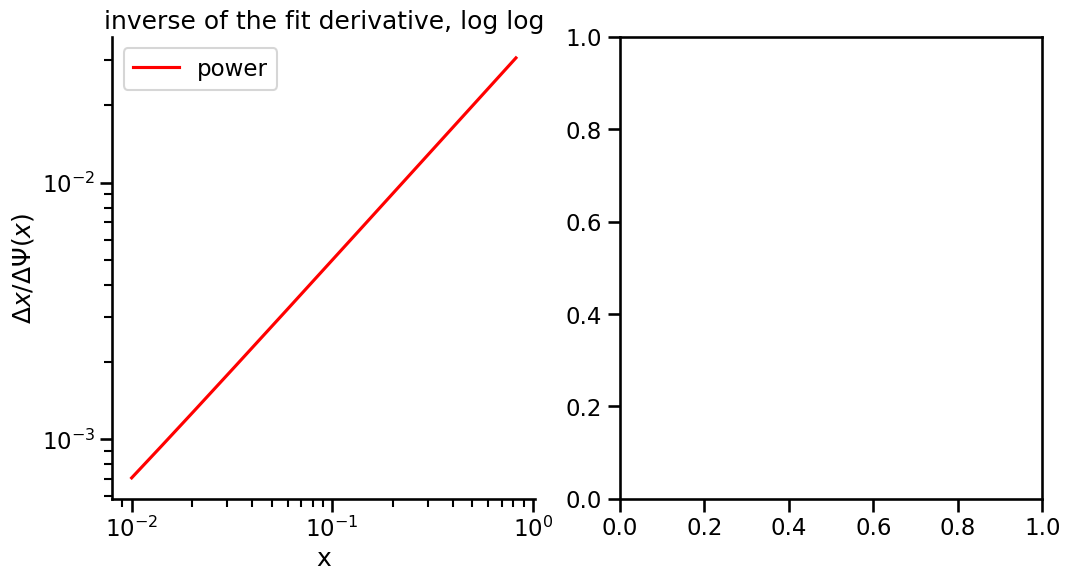

In [84]:
xs = np.linspace(nx.min(), nx.max(), 1000)

if fit_power:
    # when Weber's law in log-log space holds
    ys_power = powerfunc_const(xs, *param_power)
    # the derivative
    dydxs_power = np.diff(ys_power)/np.diff(xs)

if fit_ln:
    # when Weber's law in linear space holds
    ys_ln = lnfunc(xs, *param_ln)
    # the derivative
    dydxs_ln = np.diff(ys_ln)/np.diff(xs)


plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1)
try:
    line, = ax.plot(xs[:-1], 1/dydxs_power, 'r-', label='power')
except:
    pass

try:
    line, = ax.plot(xs[:-1], 1/dydxs_ln, 'g-', label='ln')
except:
    pass

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('x')
plt.ylabel('$\Delta x/ \Delta \Psi (x)$')
plt.title("inverse of the fit derivative, log log")
plt.legend()
sns.despine()

ax = plt.subplot(1, 2, 2)
line, = ax.plot(x, dx, 'o-')
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('$\Delta x$')
plt.xlabel('x')
plt.title("TvI on log-log, same as above")
sns.despine()


The previous two plots should be identical in shape.


### Appendix: Mathematical derivation of Fechner's law

(from Baird & Noma 1978, "Fundamentals of scaling and psychophysics", pp. 21-23)

We assume Weber's law, formulating it as

$$ \Delta x = k \cdot x$$

where x is the stimulus value, k is the proportionality constant, i.e. the Weber fraction.

We further assume that a change in sensation ($\Delta \Psi$) evoked by one JND ($\Delta x$) is always the same, it is constant. In other words, we assume that when we measure a JND, the difference we evoked in the internal dimension is constant. In yet another words, we assume that all 'subjective' JNDs, are equal, say 1.

$$ \Delta \Psi = 1$$

With that assumption we can set up the following equation by

$$
\frac{ \Delta \Psi }{ \Delta x } = \frac{1}{k \cdot x}
$$

Rearranging we have

$$
\Delta \Psi  = \frac{1}{k x} \Delta x
$$

and making $\Delta x \to 0$ and $\Delta \Psi \to 0$

$$
d \Psi  = \frac{1}{k x} d x
$$

Integrating both sides we get

$$
\int d \Psi  = \int \frac{1}{k x} d x
$$

$$
\Psi  = \frac{1}{k} \int \frac{1}{x} d x
$$

$$
\Psi  = \frac{1}{k} ln(x) + C_0
$$
